135 1.004859173557616e-16


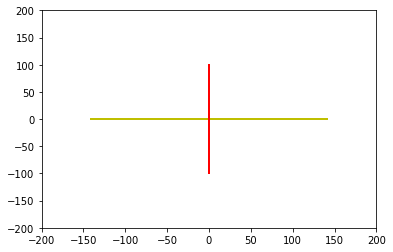

In [12]:
import Code_UNet_2.Code_UNet_Re.Net_modules.Penalty_2 as penalty
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import math
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= str(3)
loss,mse,cosine = 0,0,0



Penalty = penalty.Penalty(0)

# def rotate(p, origin=(0, 0), degrees=0):
#     angle = np.deg2rad(degrees)
#     R = np.array([[np.cos(angle), -np.sin(angle)],
#                   [np.sin(angle),  np.cos(angle)]])
#     o = np.atleast_2d(origin)
#     p = np.atleast_2d(p)
#     return np.squeeze((R @ (p.T-o.T) + o.T).T)

def rotate(point, origin, degrees):
    
    radians = degrees
    x,y = point
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = np.cos(radians)
    sin_rad = np.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y
    return qx, qy

testing_rano_1_pred = data_in = [-100.,  -100.,  100., 100., -100.,  0.,  100., -0.]

for angle in range(1):
    testing_rano_1_pred = data_in = [-100.,  -100.,  100., 100., -100.,  0.,  100., -0.]
#     print(testing_rano_1_pred)
    angle = 135
    testing_rano_1_out = testing_rano_1_pred
    
    x = rotate([testing_rano_1_out[0],testing_rano_1_out[1]], origin = (0,0), degrees = np.deg2rad(angle))
    y = rotate([testing_rano_1_out[2],testing_rano_1_out[3]], origin = (0,0), degrees = np.deg2rad(angle))
    
    testing_rano_1_true = [0,0,0,0,0,0,0,0]
    
    testing_rano_1_out[0] = x[0]
    testing_rano_1_out[1] = x[1]
    testing_rano_1_out[2] = y[0]
    testing_rano_1_out[3] = y[1]

    D1 = np.asarray([[testing_rano_1_out[1],testing_rano_1_out[3]],[testing_rano_1_out[0],testing_rano_1_out[2]]]) 
    D2 = np.asarray([[testing_rano_1_out[5],testing_rano_1_out[7]],[testing_rano_1_out[4],testing_rano_1_out[6]]]) 
    
    plt.plot(D1[0, :], D1[1, :], lw=2, c='y',label='_nolegend_')
    plt.plot(D2[0, :], D2[1, :], lw=2, c='r',label='Prediction')

    output = torch.from_numpy(np.array([testing_rano_1_out]).astype(float)).to("cuda")

    target = torch.from_numpy(np.array([testing_rano_1_out]).astype(float)).to("cuda")

    mean, mse, cosine = Penalty.MSELossorthogtest2_3(output, target)
    print(angle, cosine.item())
    
plt.xlim([-200, 200])
plt.ylim([-200, 200])
plt.show()


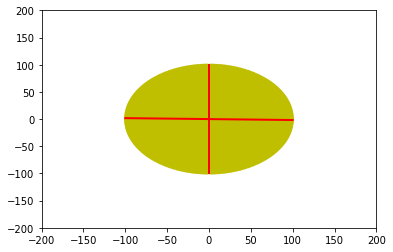

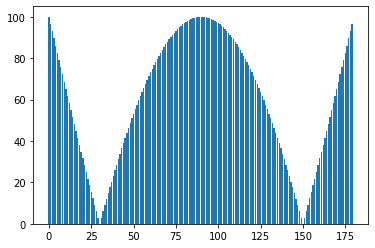

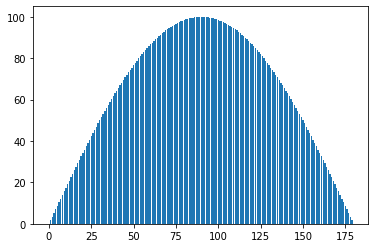

In [7]:
import Code_UNet_2.Code_UNet_Re.Net_modules.Penalty_2 as penalty
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import math
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= str(3)
loss,mse,cosine = 0,0,0



Penalty = penalty.Penalty(100)

# def rotate(p, origin=(0, 0), degrees=0):
#     angle = np.deg2rad(degrees)
#     R = np.array([[np.cos(angle), -np.sin(angle)],
#                   [np.sin(angle),  np.cos(angle)]])
#     o = np.atleast_2d(origin)
#     p = np.atleast_2d(p)
#     return np.squeeze((R @ (p.T-o.T) + o.T).T)

def rotate(point, origin, degrees):
    
    radians = degrees
    x,y = point
    offset_x, offset_y = origin
    adjusted_x = (x - offset_x)
    adjusted_y = (y - offset_y)
    cos_rad = np.cos(radians)
    sin_rad = np.sin(radians)
    qx = offset_x + cos_rad * adjusted_x + sin_rad * adjusted_y
    qy = offset_y + -sin_rad * adjusted_x + cos_rad * adjusted_y
    return qx, qy

testing_rano_1_pred = [-0.,  -100.,  0., 100., -100.,  0.,  100., -0.]

max_angle = 180
angle_out = np.zeros(max_angle)
angle_out2 = np.zeros(max_angle)
for angle in range(max_angle):
    testing_rano_1_pred = [-0.,  -100.,  0., 100., -100.,  0.,  100., -0.]
#     print(testing_rano_1_pred)
    
    testing_rano_1_out = testing_rano_1_pred
    
    x = rotate([testing_rano_1_out[0],testing_rano_1_out[1]], origin = (0,0), degrees = np.deg2rad(angle))
    y = rotate([testing_rano_1_out[2],testing_rano_1_out[3]], origin = (0,0), degrees = np.deg2rad(angle))
    
    testing_rano_1_true = [0,0,0,0,0,0,0,0]
    
    testing_rano_1_out[0] = x[0]
    testing_rano_1_out[1] = x[1]
    testing_rano_1_out[2] = y[0]
    testing_rano_1_out[3] = y[1]

    D1 = np.asarray([[testing_rano_1_out[1],testing_rano_1_out[3]],[testing_rano_1_out[0],testing_rano_1_out[2]]]) 
    D2 = np.asarray([[testing_rano_1_out[5],testing_rano_1_out[7]],[testing_rano_1_out[4],testing_rano_1_out[6]]]) 
    
    plt.plot(D1[0, :], D1[1, :], lw=2, c='y',label='_nolegend_')
    plt.plot(D2[0, :], D2[1, :], lw=2, c='r',label='Prediction')

    output = torch.from_numpy(np.array([testing_rano_1_out]).astype(float)).to("cuda")

    target = torch.from_numpy(np.array([testing_rano_1_out]).astype(float)).to("cuda")

#     mean, mse, cosine = Penalty.MSELossorthogtest2_3(output, target)
#     if angle + 45 < 180 :
#         print(angle + 45, cosine.item())
#     else:
#         print(abs(angle -(180 - 45)) , cosine.item())
    mean, mse, cosine = Penalty.MSELossorthog(output, target)
    angle_out[angle] = cosine.item()
    
    mean, mse, cosine = Penalty.MSELossorthogtest2_4(output, target)
    angle_out2[angle] = cosine.item()
#     if angle + 45 < max_angle:
#         print(angle + 45, cosine.item())
        
#     else:
#         print(abs(angle -(max_angle - 45)) , cosine.item())
        
#     print("")
    
plt.xlim([-200, 200])
plt.ylim([-200, 200])

D1 = np.asarray([[testing_rano_1_pred[1],testing_rano_1_pred[3]],[testing_rano_1_pred[0],testing_rano_1_pred[2]]]) 
D2 = np.asarray([[testing_rano_1_pred[5],testing_rano_1_pred[7]],[testing_rano_1_pred[4],testing_rano_1_pred[6]]]) 
    
plt.plot(D1[0, :], D1[1, :], lw=2, c='r',label='_nolegend_')
plt.plot(D2[0, :], D2[1, :], lw=2, c='r',label='Prediction')

plt.show()

plt.bar(range(max_angle),angle_out)
plt.show()

plt.bar(range(max_angle),angle_out2)
plt.show()

In [6]:
import numpy as np
x = "Datasets/Brats_2018_4/BiLabelsTr/Brats18_TCIA13_654_1_whseg_norm_91.npz"

with np.load(x) as data:
    a = data['RANO']
print(a)

[ 95.  39. 101. 127. 122.  88.  60.  92.]


0.9794570432566515


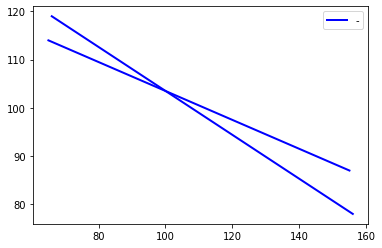

0.15932149942223853


In [7]:
import numpy as np
import matplotlib.pyplot as plt

#random example
#data_in = [22,20.1,21,21,24,20.4,20.4,20.9]
#data_in = [21,20,22,20,21.5,19,21,21]
#ground truth
#data_in = [114,  72., 100., 144.,  79., 118., 125., 127.]
#predicted output
#data_in = [115.23313904,  78.22728729,  94.15744019, 132.23550415,  64.21520233, 116.42913055, 119.44830322, 126.70836639]

#data_in = [114.,  65.,  87., 155., 132., 107.,  71.,  89.]
data_in = [114.,  65.,  87., 155., 119.,  66.,  78., 156.]

#data_in = [0,0,0,0,0,0,0,0]
x_maj = [data_in[1],data_in[3]]
x_min = [data_in[0],data_in[2]]
y_maj = [data_in[5],data_in[7]]
y_min = [data_in[4],data_in[6]]

def unit_vector(vector):
    return vector / np.linalg.norm(vector)

major = [y_maj[1] - y_maj[0], x_maj[1] - x_maj[0]]
minor = [y_min[1] - y_min[0], x_min[1] - x_min[0]]
print(abs(np.dot(unit_vector(major), unit_vector(minor))))

plt.plot(x_maj, x_min, lw=2, c='b',label='_nolegend_')
plt.plot(y_maj,y_min, lw=2, c='b',label='Prediction')
plt.legend(str(np.dot(unit_vector(major), unit_vector(minor))))
plt.show()

######################################

output_val = [x_maj[0], y_maj[0], x_maj[1], y_maj[1], x_min[0], y_min[0], x_min[1], y_min[1]]

l1 = np.sqrt(np.square(data_in[1]-data_in[3]) + np.square(data_in[0]-data_in[2]))
l2 = np.sqrt(np.square(data_in[5]-data_in[7]) + np.square(data_in[4]-data_in[6]))

# calculate the slope of each of the lines
m1 = (abs(output_val[1]/l1-output_val[3]/l1))/(abs(output_val[0]/l1-output_val[2]/l1)+1)
m2 = (abs(output_val[5]/l2-output_val[7]/l2))/(abs(output_val[4]/l2-output_val[6]/l2)+1)

# calculate the orthogonality/ perpendicularity with 0 being perpendicular, 100 being parallel
orthog = np.dot(m1,m2)

print(orthog)